# Innovating Journalism
## Practical Python exercise 4: Analyzing data (II)

*Damian Trilling and Penny Sheets*

This week, we will particular look at techniques for aggregating data and for joining datasets.

https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=37259eng&_theme=1066

https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=82800ENG&_theme=1064


In [22]:
import pandas as pd
%matplotlib inline

In [23]:
%ls

01-getting_started.ipynb
02-accessing_data.ipynb
02-accessing_data_damian_groep1.ipynb
02-accessing_data_damiangroep2.ipynb
03-analyzing_data.ipynb
03-analyzing_data_damiangroep1.ipynb
04-join_and_aggregate.ipynb
37259eng_UntypedDataSet_15112018_202634.csv
37259eng_UntypedDataSet_15112018_204553.csv
82800ENG_UntypedDataSet_15112018_205454.csv
EtenDrinken.json
Speeches_UK_Cleaned.csv
mywordcloud.png
mywordcloud.svg
stock.csv


In [24]:
# neuken = pd.read_csv('37259eng_UntypedDataSet_15112018_202634.csv', delimiter=';')

In [25]:
population = pd.read_csv('37259eng_UntypedDataSet_15112018_204553.csv', delimiter=';')

In [26]:
import numpy as np

In [27]:
neuken['LiveBornChildrenRatio_3'].map(type).value_counts()

<class 'float'>    2088
Name: LiveBornChildrenRatio_3, dtype: int64

In [28]:
# neuken['LiveBornChildrenRatio_3'] = neuken['LiveBornChildrenRatio_3'].map(float)

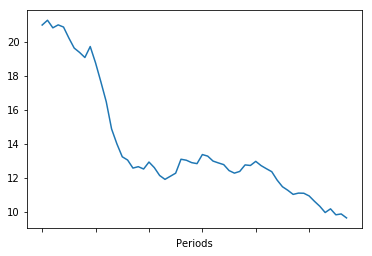

In [29]:
neuken.groupby(['Periods'])['LiveBornChildrenRatio_3'].agg(np.mean).plot()

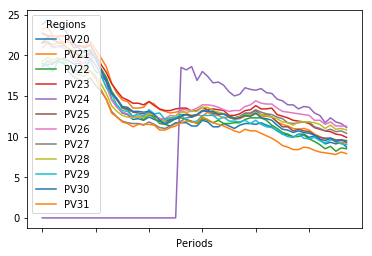

In [30]:
neuken.groupby(['Periods','Regions'])['LiveBornChildrenRatio_3'].agg(sum).unstack().plot()

In [140]:
economie = pd.read_csv('82800ENG_UntypedDataSet_15112018_205454.csv', delimiter=';')
economie.head()

,ID,EconomicSectorsSIC2008,Regions,Periods,GDPVolumeChanges_1
0,132,T001081,PV20,1996JJ00,9.3
1,133,T001081,PV20,1997JJ00,-2.0
2,134,T001081,PV20,1998JJ00,-0.9
3,135,T001081,PV20,1999JJ00,-0.7
4,136,T001081,PV20,2000JJ00,1.5


In [141]:
population = pd.read_csv('37259eng_UntypedDataSet_18112018_115342.csv', delimiter=';')
population.head()

,ID,Sex,Regions,Periods,LiveBornChildren_2
0,290,T001038,PV20,1960JJ00,8868.0
1,291,T001038,PV20,1961JJ00,9062.0
2,292,T001038,PV20,1962JJ00,9165.0
3,293,T001038,PV20,1963JJ00,9518.0
4,294,T001038,PV20,1964JJ00,9671.0


In [142]:
# remove unnecessary columns
economie.drop('ID',axis=1,inplace=True)
population.drop('ID',axis=1,inplace=True)
# remove differentiation by sex
population = population[population['Sex']=='T001038']
population.drop('Sex',axis=1,inplace = True)
# keep only rows of economie dataframe that contain the total economic activity
economie = economie[economie['EconomicSectorsSIC2008']=='T001081   ']
economie.drop('EconomicSectorsSIC2008', axis=1, inplace=True)

In [143]:
# remove those evil spaces at the end of the names of the provinces 
population['Regions'] = population['Regions'].map(lambda x: x.strip())
economie['Regions'] = economie['Regions'].map(lambda x: x.strip())

In [144]:
newdf = population.merge(economie, on=['Periods','Regions'], how='inner')

In [145]:
newdf

,Regions,Periods,LiveBornChildren_2,GDPVolumeChanges_1
0,PV20,1996JJ00,6148.0,9.3
1,PV20,1997JJ00,6336.0,-2.0
2,PV20,1998JJ00,6472.0,-0.9
3,PV20,1999JJ00,6515.0,-0.7
4,PV20,2000JJ00,6510.0,1.5
5,PV20,2001JJ00,6626.0,3.9
6,PV20,2002JJ00,6523.0,2.1
7,PV20,2003JJ00,6438.0,2.3
8,PV20,2004JJ00,6141.0,2.2
9,PV20,2005JJ00,5943.0,-0.7


In [197]:
df1 = economie.groupby(['Periods','Regions']).agg(sum)
df1.head(3)

GDPVolumeChanges_1
Periods  Regions                    
1996JJ00 PV20                    9.3
         PV21                    2.6
         PV22                    2.2

In [198]:
df2 = population.groupby(['Periods','Regions']).agg(sum)
df2.head(3)

LiveBornChildren_2
Periods  Regions                    
1960JJ00 PV20                 8868.0
         PV21                10280.0
         PV22                 6766.0

In [199]:
df3 = df1.join(df2)
df3.head()

GDPVolumeChanges_1  LiveBornChildren_2
Periods  Regions                                        
1996JJ00 PV20                    9.3              6148.0
         PV21                    2.6              7424.0
         PV22                    2.2              5349.0
         PV23                    3.1             13314.0
         PV24                    3.3              4170.0

In [147]:
newdf.index = pd.DatetimeIndex(newdf['Periods'].map(lambda x: "1-1-{}".format(x[:4])))

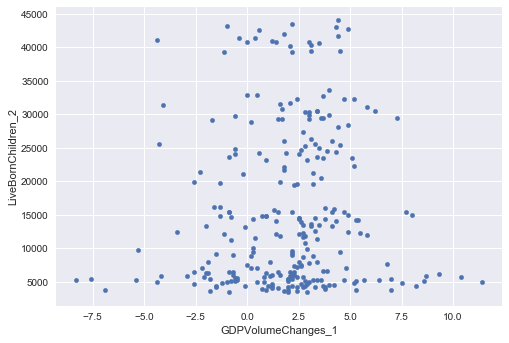

In [149]:
newdf.plot(y='LiveBornChildren_2', x='GDPVolumeChanges_1', kind='scatter')

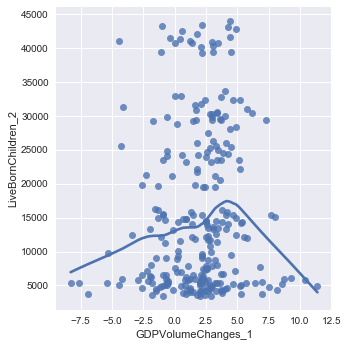

In [207]:
import seaborn as sns
sns.lmplot(y='LiveBornChildren_2', x='GDPVolumeChanges_1', data=newdf,
           fit_reg=True, lowess=True, robust=False) 

Regions
PV20    AxesSubplot(0.125,0.125;0.775x0.755)
PV21    AxesSubplot(0.125,0.125;0.775x0.755)
PV22    AxesSubplot(0.125,0.125;0.775x0.755)
PV23    AxesSubplot(0.125,0.125;0.775x0.755)
PV24    AxesSubplot(0.125,0.125;0.775x0.755)
PV25    AxesSubplot(0.125,0.125;0.775x0.755)
PV26    AxesSubplot(0.125,0.125;0.775x0.755)
PV27    AxesSubplot(0.125,0.125;0.775x0.755)
PV28    AxesSubplot(0.125,0.125;0.775x0.755)
PV29    AxesSubplot(0.125,0.125;0.775x0.755)
PV30    AxesSubplot(0.125,0.125;0.775x0.755)
PV31    AxesSubplot(0.125,0.125;0.775x0.755)
Name: GDPVolumeChanges_1, dtype: object

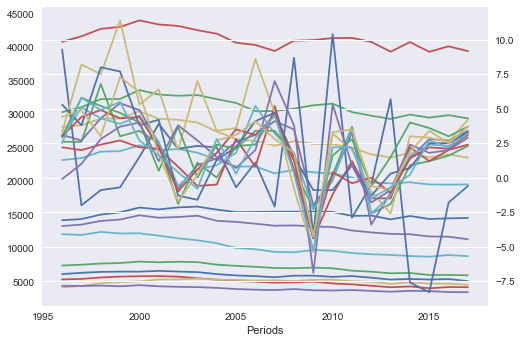

In [154]:
newdf.groupby('Regions')['LiveBornChildren_2'].plot()
newdf.groupby('Regions')['GDPVolumeChanges_1'].plot(secondary_y=True)

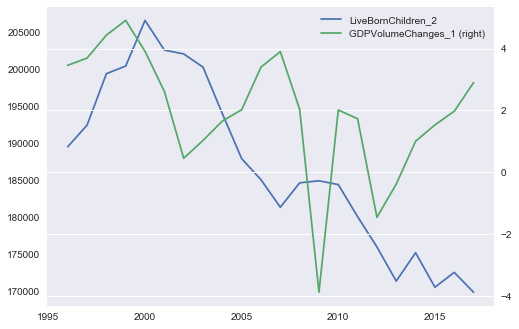

In [175]:
newdf.groupby(lambda x: x)['LiveBornChildren_2'].agg(sum).plot(legend = True)
newdf.groupby(lambda x: x)['GDPVolumeChanges_1'].agg(np.mean).plot(legend=True, secondary_y=True)

In [170]:
newdf['LiveBornChildren_2'].groupby(lambda x: x).agg(np.mean)

1996-01-01    15793.416667
1997-01-01    16036.916667
1998-01-01    16617.333333
1999-01-01    16703.750000
2000-01-01    17218.250000
2001-01-01    16883.583333
2002-01-01    16840.250000
2003-01-01    16691.416667
2004-01-01    16167.250000
2005-01-01    15659.166667
2006-01-01    15421.416667
2007-01-01    15111.333333
2008-01-01    15386.166667
2009-01-01    15409.583333
2010-01-01    15366.416667
2011-01-01    15005.000000
2012-01-01    14663.250000
2013-01-01    14278.416667
2014-01-01    14598.416667
2015-01-01    14209.166667
2016-01-01    14376.666667
2017-01-01    14153.000000
Name: LiveBornChildren_2, dtype: float64

In [176]:
sns.lmplot?

In [ ]:
newdf['LiveBornChildren_2'].agg

In [40]:
df3 = df1.join(df2)

In [53]:
df3[['LiveBornChildrenRatio_3']].unstack()

LiveBornChildrenRatio_3                                            \
Regions                     PV20  PV21  PV22  PV23  PV24  PV25  PV26  PV27   
Periods                                                                      
1996JJ00                    11.0  12.1  11.7  12.6  15.0  12.3  13.2  12.3   
1997JJ00                    11.4  12.2  11.7  12.8  15.2  12.4  13.2  12.5   
1998JJ00                    11.6  12.5  12.1  13.2  16.0  12.8  13.7  12.9   
1999JJ00                    11.6  12.5  12.3  13.3  15.8  12.8  13.9  12.9   
2000JJ00                    11.5  12.8  12.3  13.8  15.7  13.2  14.4  13.3   
2001JJ00                    11.7  12.5  12.3  13.4  15.9  12.7  14.1  13.0   
2002JJ00                    11.4  12.5  12.0  13.4  15.4  12.7  14.0  12.8   
2003JJ00                    11.2  12.4  11.4  13.5  15.3  12.4  14.0  12.7   
2004JJ00                    10.7  11.8  11.0  12.7  14.6  11.8  13.5  12.4   
2005JJ00                    10.3  11.5  10.5  12.5  14.4  11.2  13.1  12.2   
2006JJ00                    10.2  11.3  10.3  12.3  13.9  11.2  13.0  11.7   
2007JJ00                     9.9  11.0  10.0  12.0  13.9  10.7  12.9  11.6   
2008JJ00                    10.3  10.9  10.0  11.9  13.4  10.9  12.8  11.7   
2009JJ00                    10.3  11.0  10.2  11.8  13.7  10.7  12.7  11.8   
2010JJ00                     9.9  10.8   9.7  11.6  13.6  10.6  12.6  11.8   
2011JJ00                    10.1  10.3   9.4  11.1  12.9  10.2  12.0  11.2   
2012JJ00                     9.6  10.0   9.0  10.9  12.6   9.9  12.0  11.0   
2013JJ00                     9.1   9.7   8.5  10.7  11.7   9.8  11.5  10.7   
2014JJ00                     9.3   9.8   8.8  10.6  12.3   9.8  11.8  10.9   
2015JJ00                     9.1   9.3   8.2  10.3  11.8   9.6  11.3  10.6   
2016JJ00                     9.3   9.3   8.6  10.2  11.6   9.6  11.3  10.7   
2017JJ00                     8.7   9.2   8.5   9.9  11.1   9.5  11.3  10.4   

                                  
Regions   PV28  PV29  PV30  PV31  
Periods                           
1996JJ00  12.2  11.9  12.2  10.7  
1997JJ00  12.4  11.8  12.3  10.5  
1998JJ00  12.7  12.0  12.6  10.9  
1999JJ00  12.7  11.6  12.5  10.7  
2000JJ00  12.9  12.0  12.9  10.7  
2001JJ00  12.7  11.5  12.3  10.4  
2002JJ00  12.6  11.2  12.2  10.1  
2003JJ00  12.4  11.1  12.0   9.8  
2004JJ00  12.2  10.8  11.4   9.4  
2005JJ00  11.8  10.3  10.9   8.9  
2006JJ00  11.7  10.0  10.8   8.7  
2007JJ00  11.4   9.9  10.5   8.4  
2008JJ00  11.8  10.3  10.7   8.4  
2009JJ00  11.8   9.8  10.5   8.7  
2010JJ00  11.8   9.7  10.4   8.6  
2011JJ00  11.7   9.9  10.2   8.3  
2012JJ00  11.5   9.5   9.7   8.1  
2013JJ00  11.0   9.2   9.5   8.0  
2014JJ00  11.4   9.6   9.8   7.9  
2015JJ00  10.9   9.5   9.4   7.8  
2016JJ00  11.0   9.1   9.6   8.1  
2017JJ00  10.8   9.0   9.3   7.9

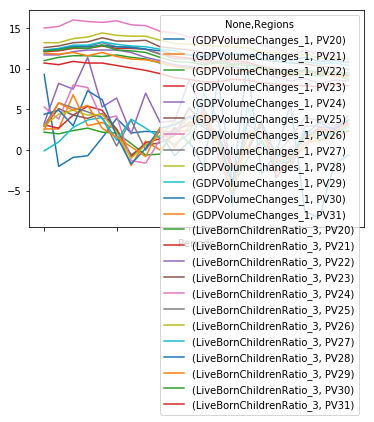

In [42]:
df3.unstack().plot()

In [43]:
df3.groupby('Periods').agg(np.mean)

,GDPVolumeChanges_1,LiveBornChildrenRatio_3
Periods,,
1996JJ00,3.458333,12.266667
1997JJ00,3.691667,12.366667
1998JJ00,4.433333,12.750000
1999JJ00,4.908333,12.716667
2000JJ00,3.908333,12.958333
2001JJ00,2.616667,12.708333
2002JJ00,0.458333,12.525000
2003JJ00,1.033333,12.350000
2004JJ00,1.658333,11.858333


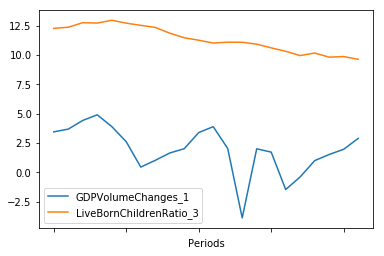

In [44]:
df3.groupby('Periods').agg(np.mean).plot()

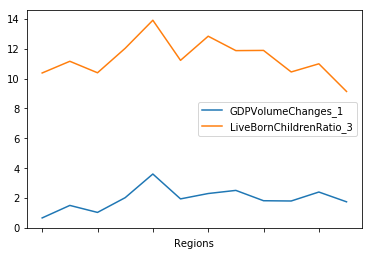

In [45]:
df3.groupby('Regions').agg(np.mean).plot()

In [46]:
df3

GDPVolumeChanges_1  LiveBornChildrenRatio_3
Periods  Regions                                             
1996JJ00 PV20                    9.3                     11.0
         PV21                    2.6                     12.1
         PV22                    2.2                     11.7
         PV23                    3.1                     12.6
         PV24                    3.3                     15.0
         PV25                    2.9                     12.3
         PV26                    5.3                     13.2
         PV27                    3.0                     12.3
         PV28                    3.0                     12.2
         PV29                   -0.1                     11.9
         PV30                    4.4                     12.2
         PV31                    2.5                     10.7
1997JJ00 PV20                   -2.0                     11.4
         PV21                    2.6                     12.2
         PV22                    2.0                     11.7
         PV23                    2.7                     12.8
         PV24                    8.2                     15.2
         PV25                    5.1                     12.4
         PV26                    3.8                     13.2
         PV27                    5.8                     12.5
         PV28                    4.4                     12.4
         PV29                    1.0                     11.8
         PV30                    4.9                     12.3
         PV31                    5.8                     10.5
1998JJ00 PV20                   -0.9                     11.6
         PV21                    6.8                     12.5
         PV22                    2.4                     12.1
         PV23                    4.3                     13.2
         PV24                    7.5                     16.0
         PV25                    4.3                     12.8
...                              ...                      ...
2015JJ00 PV26                    2.5                     11.3
         PV27                    3.6                     10.6
         PV28                    2.2                     10.9
         PV29                    1.8                      9.5
         PV30                    3.4                      9.4
         PV31                    2.7                      7.8
2016JJ00 PV20                   -1.8                      9.3
         PV21                    1.6                      9.3
         PV22                    2.0                      8.6
         PV23                    2.7                     10.2
         PV24                    2.6                     11.6
         PV25                    2.3                      9.6
         PV26                    2.5                     11.3
         PV27                    3.0                     10.7
         PV28                    2.1                     11.0
         PV29                    2.0                      9.1
         PV30                    2.5                      9.6
         PV31                    2.2                      8.1
2017JJ00 PV20                   -0.6                      8.7
         PV21                    2.3                      9.2
         PV22                    2.4                      8.5
         PV23                    3.4                      9.9
         PV24                    4.2                     11.1
         PV25                    3.2                      9.5
         PV26                    3.3                     11.3
         PV27                    3.7                     10.4
         PV28                    3.1                     10.8
         PV29                    2.9                      9.0
         PV30                    3.7                      9.3
         PV31                    3.2                      7.9

[264 rows x 2 columns]

In [212]:
# ga naar https://www.ois.amsterdam.nl/popup/1219 en copy-paste ALLEEN de tabel

In [354]:
#df = pd.read_clipboard()

In [355]:
df = pd.read_csv('wozwaarde.csv', delimiter=';')

In [358]:
df.head()

,wijk,2014,2015,2016,2017,2018
0,A00 Burgwallen-Oude Zijde,263417.0,273525.0,289984.0,339548.0,400010.0
1,A01 Burgwallen-Nieuwe Zijde,267895.0,281193.0,296762.0,351214.0,391011.0
2,A02 Grachtengordel-West,490251.0,502230.0,560841.0,674610.0,755091.0
3,A03 Grachtengordel-Zuid,469946.0,478371.0,531225.0,627625.0,697576.0
4,A04 Nieuwmarkt/Lastage,295239.0,303500.0,340364.0,386716.0,438942.0


In [360]:
df['code'] = df['wijk'].map(lambda x: x.split()[0])

In [362]:
stadsdelen = df[df['code'].map(lambda x: len(x)==1)]
stadsdelen['wijk'] = stadsdelen['wijk'].map(lambda x: x[2:])

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [363]:
stadsdeelcodes = {}
for k, v in stadsdelen[['wijk','code']].to_dict(orient='index').items():
    stadsdeelcodes.update({v['code']: v['wijk']})

In [364]:
stadsdeelcodes

{'A': 'Centrum',
 'B': 'Westpoort',
 'E': 'West',
 'F': 'Nieuw-West',
 'K': 'Zuid',
 'M': 'Oost',
 'N': 'Noord',
 'T': 'Zuidoost'}

In [365]:
wijken = df[df['code'].map(lambda x: len(x)>1)]

In [366]:
wijken['wijk'] = wijken['wijk'].map(lambda x: x[4:])

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [367]:
wijken

,wijk,2014,2015,2016,2017,2018,code
0,Burgwallen-Oude Zijde,263417.0,273525.0,289984.0,339548.0,400010.0,A00
1,Burgwallen-Nieuwe Zijde,267895.0,281193.0,296762.0,351214.0,391011.0,A01
2,Grachtengordel-West,490251.0,502230.0,560841.0,674610.0,755091.0,A02
3,Grachtengordel-Zuid,469946.0,478371.0,531225.0,627625.0,697576.0,A03
4,Nieuwmarkt/Lastage,295239.0,303500.0,340364.0,386716.0,438942.0,A04
5,Haarlemmerbuurt,304924.0,311743.0,345189.0,403267.0,458522.0,A05
6,Jordaan,270390.0,285877.0,307344.0,347740.0,402186.0,A06
7,De Weteringschans,344649.0,359119.0,399942.0,458010.0,515192.0,A07
8,Weesperbuurt/Plantage,307440.0,322276.0,353628.0,413388.0,473643.0,A08
9,Oostelijke Eilanden/Kadijken,253990.0,256421.0,276481.0,316261.0,381774.0,A09


In [368]:
wijken['stadsdeel'] = wijken['code'].map(lambda x: stadsdeelcodes[x[:1]])

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [369]:
wijken.columns

Index(['wijk', '2014', '2015', '2016', '2017', '2018', 'code', 'stadsdeel'], dtype='object')

In [421]:
wijken

,wijk,2014,2015,2016,2017,2018,code,stadsdeel
0,Burgwallen-Oude Zijde,263417.0,273525.0,289984.0,339548.0,400010.0,A00,Centrum
1,Burgwallen-Nieuwe Zijde,267895.0,281193.0,296762.0,351214.0,391011.0,A01,Centrum
2,Grachtengordel-West,490251.0,502230.0,560841.0,674610.0,755091.0,A02,Centrum
3,Grachtengordel-Zuid,469946.0,478371.0,531225.0,627625.0,697576.0,A03,Centrum
4,Nieuwmarkt/Lastage,295239.0,303500.0,340364.0,386716.0,438942.0,A04,Centrum
5,Haarlemmerbuurt,304924.0,311743.0,345189.0,403267.0,458522.0,A05,Centrum
6,Jordaan,270390.0,285877.0,307344.0,347740.0,402186.0,A06,Centrum
7,De Weteringschans,344649.0,359119.0,399942.0,458010.0,515192.0,A07,Centrum
8,Weesperbuurt/Plantage,307440.0,322276.0,353628.0,413388.0,473643.0,A08,Centrum
9,Oostelijke Eilanden/Kadijken,253990.0,256421.0,276481.0,316261.0,381774.0,A09,Centrum


In [430]:
wijken_long = wijken.melt(id_vars=['wijk','stadsdeel'], 
                          value_vars=['2014', '2015', '2016', '2017', '2018'],
                          value_name='woz-waarde',
                          var_name = 'year')

In [431]:
wijken_long

,wijk,stadsdeel,year,woz-waarde
0,Burgwallen-Oude Zijde,Centrum,2014,263417.0
1,Burgwallen-Nieuwe Zijde,Centrum,2014,267895.0
2,Grachtengordel-West,Centrum,2014,490251.0
3,Grachtengordel-Zuid,Centrum,2014,469946.0
4,Nieuwmarkt/Lastage,Centrum,2014,295239.0
5,Haarlemmerbuurt,Centrum,2014,304924.0
6,Jordaan,Centrum,2014,270390.0
7,De Weteringschans,Centrum,2014,344649.0
8,Weesperbuurt/Plantage,Centrum,2014,307440.0
9,Oostelijke Eilanden/Kadijken,Centrum,2014,253990.0


,wijk,stadsdeel,code,year,woz-waarde
0,Burgwallen-Oude Zijde,Centrum,A00,2014,263417.0
1,Burgwallen-Nieuwe Zijde,Centrum,A01,2014,267895.0
2,Grachtengordel-West,Centrum,A02,2014,490251.0
3,Grachtengordel-Zuid,Centrum,A03,2014,469946.0
4,Nieuwmarkt/Lastage,Centrum,A04,2014,295239.0
5,Haarlemmerbuurt,Centrum,A05,2014,304924.0
6,Jordaan,Centrum,A06,2014,270390.0
7,De Weteringschans,Centrum,A07,2014,344649.0
8,Weesperbuurt/Plantage,Centrum,A08,2014,307440.0
9,Oostelijke Eilanden/Kadijken,Centrum,A09,2014,253990.0


In [372]:
wijken_long.to_csv('wijken_long.csv')

In [373]:
wijken_long.index = pd.DatetimeIndex(wijken_long.year.map(lambda x: "1-1-{}".format(x)))

In [374]:
wijken_long.head()

,wijk,stadsdeel,code,year,woz-waarde
year,,,,,
2014-01-01,Burgwallen-Oude Zijde,Centrum,A00,2014,263417.0
2014-01-01,Burgwallen-Nieuwe Zijde,Centrum,A01,2014,267895.0
2014-01-01,Grachtengordel-West,Centrum,A02,2014,490251.0
2014-01-01,Grachtengordel-Zuid,Centrum,A03,2014,469946.0
2014-01-01,Nieuwmarkt/Lastage,Centrum,A04,2014,295239.0


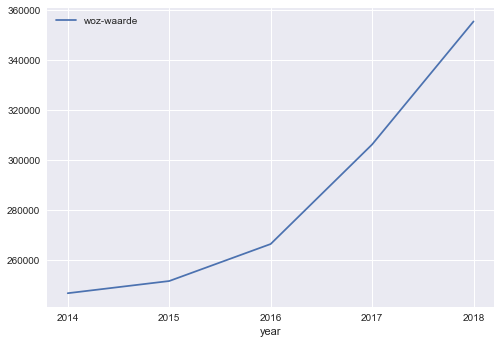

In [442]:
wijken_long.groupby('year').agg(np.mean).plot(xticks=[0,1,2,3,4])

In [433]:
wijken_long.plot?

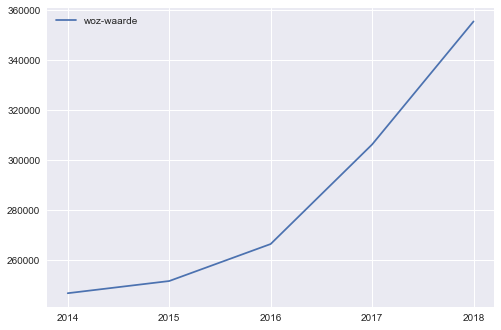

In [376]:
wijken_long.groupby(lambda x: x).agg(np.mean).plot()

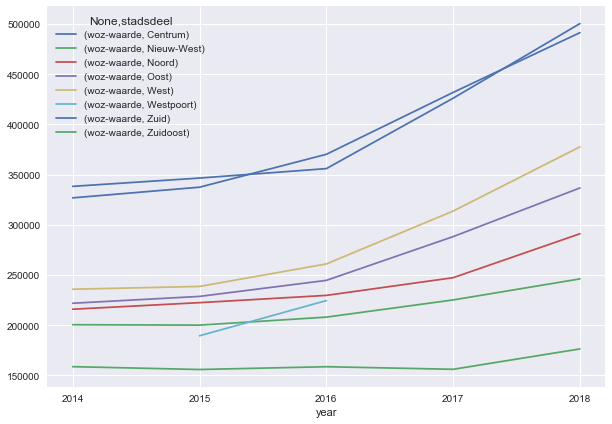

In [449]:
wijken_long.groupby(['year','stadsdeel']).agg(np.mean).unstack().plot(
    figsize=[10,7], xticks=range(5))

In [451]:
wijken_long.groupby(['year','stadsdeel']).agg(np.mean).unstack()

woz-waarde                                                         \
stadsdeel    Centrum     Nieuw-West          Noord           Oost      West   
year                                                                          
2014        326814.1  200453.500000  215879.500000  221828.142857  235801.0   
2015        337425.5  200028.000000  222417.200000  228636.000000  238568.8   
2016        370176.0  208002.428571  229650.466667  244608.428571  260979.4   
2017        431837.9  225116.571429  247279.400000  288196.357143  313645.2   
2018        491394.7  246089.000000  291062.866667  336683.500000  377618.1   

                                                 
stadsdeel Westpoort         Zuid       Zuidoost  
year                                             
2014            NaN  338256.8000  158662.833333  
2015       189402.0  346524.6250  155835.000000  
2016       224491.0  355919.6250  158611.000000  
2017            NaN  426073.5000  156034.571429  
2018            NaN  500404.5625  176345.571429

In [378]:
oost = wijken_long[wijken_long['stadsdeel']=='Oost']

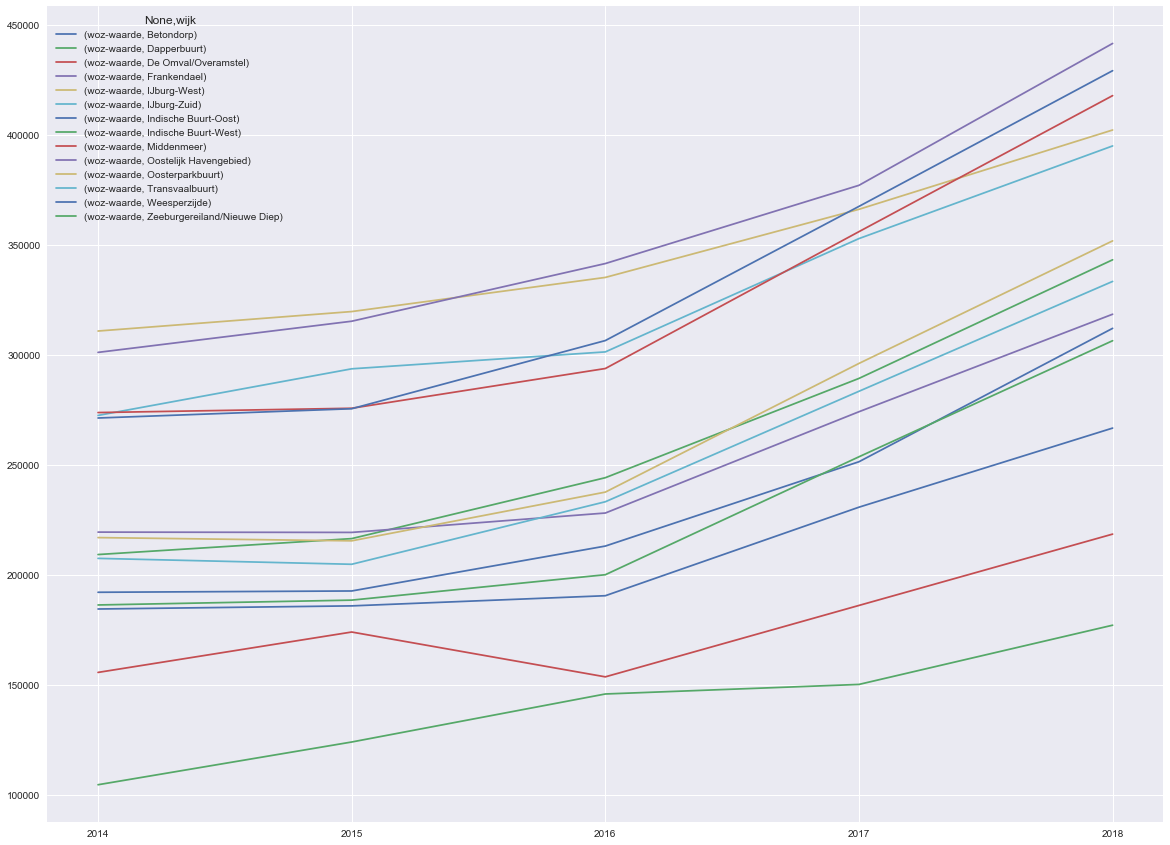

In [379]:
oost.groupby([lambda x: x,'wijk']).agg(np.mean).unstack().plot(figsize=[20,15])

In [381]:
oost[oost.wijk=='Dapperbuurt']

,wijk,stadsdeel,code,year,woz-waarde
year,,,,,
2014-01-01,Dapperbuurt,Oost,M29,2014,209223.0
2015-01-01,Dapperbuurt,Oost,M29,2015,216466.0
2016-01-01,Dapperbuurt,Oost,M29,2016,244155.0
2017-01-01,Dapperbuurt,Oost,M29,2017,289299.0
2018-01-01,Dapperbuurt,Oost,M29,2018,343221.0


In [383]:
oost[oost.wijk.str.startswith('Indisch')]

,wijk,stadsdeel,code,year,woz-waarde
year,,,,,
2014-01-01,Indische Buurt-West,Oost,M31,2014,186301.0
2014-01-01,Indische Buurt-Oost,Oost,M32,2014,192071.0
2015-01-01,Indische Buurt-West,Oost,M31,2015,188495.0
2015-01-01,Indische Buurt-Oost,Oost,M32,2015,192657.0
2016-01-01,Indische Buurt-West,Oost,M31,2016,200048.0
2016-01-01,Indische Buurt-Oost,Oost,M32,2016,213074.0
2017-01-01,Indische Buurt-West,Oost,M31,2017,253664.0
2017-01-01,Indische Buurt-Oost,Oost,M32,2017,251413.0
2018-01-01,Indische Buurt-West,Oost,M31,2018,306433.0


In [404]:
wijken_long.groupby(['year','stadsdeel'])['woz-waarde'].agg([min,max])

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  if __name__ == '__main__':


min        max
year stadsdeel                      
2014 Centrum     253990.0   490251.0
     Nieuw-West  141387.0   374106.0
     Noord       150516.0   428832.0
     Oost        104568.0   310839.0
     West        164263.0   564043.0
     Westpoort        NaN        NaN
     Zuid        225636.0   664230.0
     Zuidoost    126373.0   227969.0
2015 Centrum     256421.0   502230.0
     Nieuw-West  139528.0   368054.0
     Noord       150413.0   437326.0
     Oost        123993.0   319688.0
     West        167242.0   595181.0
     Westpoort   189402.0   189402.0
     Zuid        228441.0   664514.0
     Zuidoost    123214.0   224884.0
2016 Centrum     276481.0   560841.0
     Nieuw-West  139872.0   388082.0
     Noord       154881.0   442483.0
     Oost        145825.0   341516.0
     West        182309.0   630566.0
     Westpoort   224491.0   224491.0
     Zuid        241511.0   677933.0
     Zuidoost    121273.0   234149.0
2017 Centrum     316261.0   674610.0
     Nieuw-West  157018.0   430190.0
     Noord       168528.0   480514.0
     Oost        150175.0   377085.0
     West        219773.0   754544.0
     Westpoort        NaN        NaN
     Zuid        266394.0   839342.0
     Zuidoost     78137.0   251670.0
2018 Centrum     381774.0   755091.0
     Nieuw-West   93104.0   483447.0
     Noord       196081.0   565361.0
     Oost        177096.0   441577.0
     West        269738.0   844347.0
     Westpoort        NaN        NaN
     Zuid        330366.0  1003743.0
     Zuidoost     81201.0   267328.0

Difference between most expensive and least expensive buurt within stadsdeel


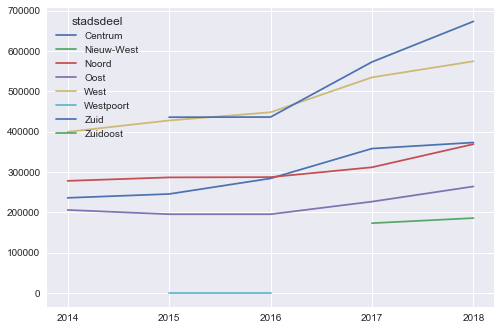

In [410]:
print('Difference between most expensive and least expensive buurt within stadsdeel')
wijken_long.groupby([lambda x: x,'stadsdeel'])['woz-waarde'].agg(lambda x: max(x)-min(x)).unstack().plot()

Difference between most expensive and least expensive buurt within stadsdeel


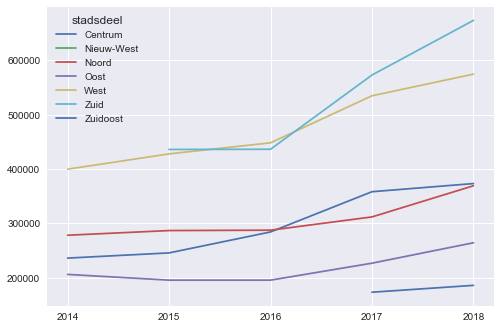

In [420]:
print('Difference between most expensive and least expensive buurt within stadsdeel')
wijken_long[wijken_long['stadsdeel']!= 'Westpoort'].groupby(
    [lambda x: x,'stadsdeel'])['woz-waarde'].agg(lambda x: max(x)-min(x)).unstack().plot()

We see that differences within stadsdeel rise

To do: van 
https://www.ois.amsterdam.nl/feiten-en-cijfers/
cijfers voor
- a vestiging
- b vertrek ophalen

